# Plot frames and Sensors of 4m biaxal rock friction apparatus

Plot schematics of 4m rock friction apparatus and sensor arrays for the introduction figures.


2023.11.7 Kurama Okubo

- 2025.3.7 update for the supplementary information of sensor array.

In [22]:
import os
import obspy
from obspy import read, Stream, Trace
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib inline
import glob
from glob import glob
import numpy as np
import pandas as pd
import datetime
from datetime import timedelta
from tqdm import tqdm
import warnings

from matplotlib.patches import Rectangle, Circle, Ellipse
import matplotlib.cm as cm

plt.rcParams["font.family"] = 'Arial'
# plt.rcParams["font.sans-serif"] = "DejaVu Sans, Arial, Helvetica, Lucida Grande, Verdana, Geneva, Lucid, Avant Garde, sans-serif"
plt.rcParams["font.size"] = 12
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 5
plt.rcParams["xtick.major.width"] = 0.5
plt.rcParams["xtick.minor.size"] = 2
plt.rcParams["xtick.minor.width"] = 1
plt.rcParams["xtick.minor.visible"] = True


plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.major.size"] = 5
plt.rcParams["ytick.major.width"] = 0.5
plt.rcParams["ytick.minor.size"] = 2
plt.rcParams["ytick.minor.width"] = 1
plt.rcParams["ytick.minor.visible"] = True

In [23]:
figdir = "../figure/schematic"
if not os.path.exists(figdir):
    os.makedirs(figdir)

In [24]:
channel_finame = '../../../Others/AEchanneltable/AEsensorlocation_onFB03_table.csv'

In [25]:
df_array = pd.read_csv(channel_finame)

channel_loc={}

for i in range(len(df_array)):
    stnm = df_array.iloc[i].Instrument_Label
    xtemp = df_array.iloc[i].North.astype('float')
    ytemp = df_array.iloc[i].East.astype('float')
    ztemp = df_array.iloc[i].Down.astype('float')
    channel_loc[stnm] = [xtemp, ytemp, ztemp]
    
Nsensor = len(channel_loc)
# channel_loc

# 1. Plot side view of specimen

In [26]:
disp_x = 270+np.arange(0, 16)*240
disp_y = np.ones(len(disp_x))*200
disp_y

array([200., 200., 200., 200., 200., 200., 200., 200., 200., 200., 200.,
       200., 200., 200., 200., 200.])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


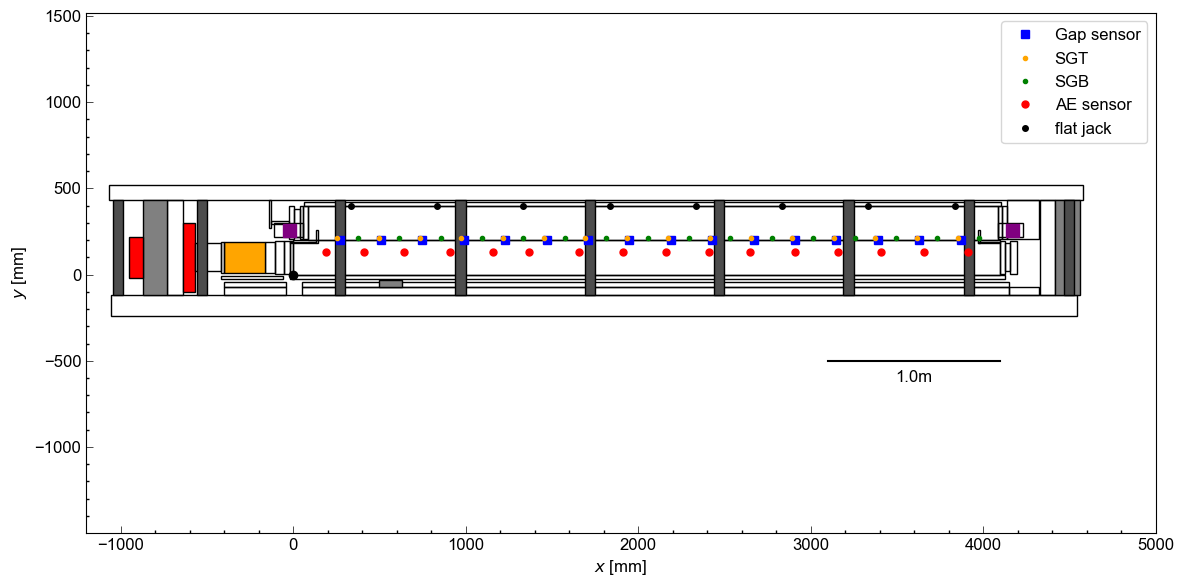

In [27]:
# Plot two rock specimen

fig, ax = plt.subplots(1, 1, figsize=(12, 6))

# bottom sample
left = 0 #[mm]
bottom = 0 #[mm]
width = 4100 #[mm]
height = 200 #[mm]
fontsize=12

rect_bot = Rectangle((left, bottom), width, height, fill=False, color='k')

# top sample
xtop_shift = 85 #[mm]
rect_top = Rectangle((left+xtop_shift, bottom+height), width-100, height, fill=False, color='k')

ax.axis('equal')
ax.add_patch(rect_bot)
ax.add_patch(rect_top)
ax.autoscale()

# Plot origin of coordinate
ax.plot(0, 0, "ko", label=None)

# Plot displacement sensor
disp_x = 270+np.arange(0, 16)*240
disp_y = np.ones(len(disp_x))*200
ax.plot(disp_x, disp_y, "bs", ms=6, label="Gap sensor")

# Plot Strain gouges (south side)
SGT_x = xtop_shift + 170 + np.arange(0, 16)*240
SGB_x = xtop_shift + 170 + 120 + np.arange(0, 16)*240
SG_y = np.ones(len(SGT_x))*210

ax.plot(SGT_x, SG_y, "o", c="orange", ms=3, label="SGT")
ax.plot(SGB_x, SG_y, "o", c="g", ms=3, label="SGB")

# Plot AE sensors
df_ARsensor_south = df_array[df_array["East"] > 0]
ax.plot(df_ARsensor_south["North"].values, height-df_ARsensor_south["Down"].values, "o", c="r", ms=5, label="AE sensor")

# Plot flat jack
flatjack_x = xtop_shift + 250 + np.arange(0, 8)*500
flatjack_y = np.ones(len(flatjack_x))*400
ax.plot(flatjack_x, flatjack_y, "o", c="k", ms=4, label="flat jack")
ax.legend(loc=0)

#------------------------#
# Plot parts of frames 
#------------------------#

# We plot the parts of frames in the real scale

# top west
top_center_y = 300

sideplate_westtop1 = Rectangle((xtop_shift-25, 205), 25, 190, fill=False, color='k')
sideplate_westtop2 = Rectangle((xtop_shift-45, 205), 20, 190, fill=False, color='k')
loadcell_westtop = Rectangle((xtop_shift-45-35, top_center_y-80), 35, 160, fill=False, color='k')
sideplate_westtop3 = Rectangle((xtop_shift-45-35-30, 205), 30, 190, fill=False, color='k')
bolt_westtop = Rectangle((xtop_shift-45-35-30-105, top_center_y-7.5), 105, 15, fill=False, color='k')
sideplate_westtop4 = Rectangle((xtop_shift-45-35-30-105-10, 270), 10, 160, fill=False, color='k')

ax.add_patch(sideplate_westtop1)
ax.add_patch(sideplate_westtop2)
ax.add_patch(loadcell_westtop)
ax.add_patch(sideplate_westtop3)
ax.add_patch(bolt_westtop)
ax.add_patch(sideplate_westtop4)

# top east
sideplate_topeast1 = Rectangle((xtop_shift+4000, 205), 25, 190, fill=False, color='k')
sideplate_topeast2 = Rectangle((xtop_shift+4000+25, 205), 30, 190, fill=False, color='k')
sideblock_topeast = Rectangle((xtop_shift+4000+25+30, 205), 185, 225, fill=False, color='k')

ax.add_patch(sideplate_topeast1)
ax.add_patch(sideplate_topeast2)
ax.add_patch(sideblock_topeast)

# bottom east
sideplate_bottomeast1 = Rectangle((4100, 5), 25, 190, fill=False, color='k')
loadcell_bottomeast = Rectangle((4100+25, 20), 30, 160, fill=False, color='k')
sideplate_bottomeast2 = Rectangle((4100+25+30, 5), 40, 190, fill=False, color='k')
base_stopper_bottomeast = Rectangle((4150, -120), xtop_shift+4000+25+30+185-4150, 50, fill=False, color='k')

ax.add_patch(sideplate_bottomeast1)
ax.add_patch(loadcell_bottomeast)
ax.add_patch(sideplate_bottomeast2)
ax.add_patch(base_stopper_bottomeast)

# outer frame
upperframe_tickness = 90 
lowerframe_tickness = 120 
baseplate_tickness = 50
baseplate2_tickness = 25
LMrail_tickness = 25

# east block
eastblock_tickness=140
eastframe_tickness=90

# upper and lower frame
upperframe = Rectangle((-1070, 400+30), 5650, upperframe_tickness, fill=False, color='k')
topeastcoord_x = 5650-1070
topwestcoord_x = -1070

topplate = Rectangle((xtop_shift-20, 400), 4040, 20, fill=False, color='k')
lowerframe = Rectangle((-1055, -lowerframe_tickness-120), 5600, lowerframe_tickness, fill=False, color='k')
baseplate = Rectangle((50, -120), 4100, baseplate_tickness, fill=False, color='k')
baseplate2 = Rectangle((-20, -25), 4150, baseplate2_tickness, fill=False, color='k')
LMrail = Rectangle((50, -70), 4100, LMrail_tickness, fill=False, color='k')

eastblock = Rectangle((topeastcoord_x-160, -120), eastblock_tickness, 120+400+30, fill=True, color='gray', ec='k')
eastframe = Rectangle((topeastcoord_x-160-eastframe_tickness, -120), eastframe_tickness, 120+400+30, fill=False, color='k')

# bottom west
westblock_tickness=140
westframe_tickness=90

westblock = Rectangle((topwestcoord_x+200, -120), westblock_tickness, 120+400+30, fill=True, color='gray', ec='k')
westframe = Rectangle((topwestcoord_x+200+westblock_tickness, -120), westframe_tickness, 120+400+30, fill=False, color='k')

# shear cylinder and load cell
cylinder_center_y = 100
cylinder_radius = 200
cylinder_tickness=70
cylinder = Rectangle((topwestcoord_x+200+westblock_tickness+westframe_tickness, cylinder_center_y-cylinder_radius), cylinder_tickness, 2*cylinder_radius, fill=True, color='r', ec="k")

cyl_parts1 = Rectangle((topwestcoord_x+200+westblock_tickness+westframe_tickness+cylinder_tickness, cylinder_center_y-80), 150, 160, fill=False, color='k') # This length depends on the location of bottom rock specimen


sideplate_westlow = Rectangle((-20, 5), 20, 190, fill=False, color='k')
sideplate_westlow2 = Rectangle((-55, 5), 35, 190, fill=False, color='k')
sideplate_westlow3 = Rectangle((-105, 5), 50, 190, fill=False, color='k')
sideplate_westlow4 = Rectangle((-165, 10), 60, 180, fill=False, color='k')
orange_cylinder = Rectangle((-400, cylinder_center_y-90), 235, 180, fill=True, color='orange', ec='k')
sideplate_westlow5 = Rectangle((-420, 10), 20, 180, fill=False, color='k')
cylinder_back = Rectangle((topwestcoord_x+120, cylinder_center_y-120), 80, 240, fill=True, color='r', ec="k")
cylinder_base = Rectangle((-400, -120), 360, 50, fill=False, color='k')

cylinder_base2 = Rectangle((-400, -120+50), 360, 25, fill=False, color='k')
cylinder_base3 = Rectangle((-420, -120+50+25+20), 360, 15, fill=False, color='k')


ax.add_patch(upperframe)
ax.add_patch(lowerframe)
ax.add_patch(topplate)
ax.add_patch(baseplate)
ax.add_patch(baseplate2)
ax.add_patch(LMrail)
ax.add_patch(eastframe)
ax.add_patch(eastblock)
ax.add_patch(westframe)
ax.add_patch(westblock)
ax.add_patch(cylinder)
ax.add_patch(cyl_parts1)
ax.add_patch(sideplate_westlow)
ax.add_patch(sideplate_westlow2)
ax.add_patch(sideplate_westlow3)
ax.add_patch(sideplate_westlow4)
ax.add_patch(orange_cylinder)
ax.add_patch(sideplate_westlow5)
ax.add_patch(cylinder_back)
ax.add_patch(cylinder_base)
ax.add_patch(cylinder_base2)
ax.add_patch(cylinder_base3)

# Plot rods
rod_diameter=60
rod_x_list = [25, 510, 1310, 2010, 2760, 3510, 4260, 4960, 5540]

for rod_x in rod_x_list:
    rod = Rectangle((-1070+rod_x, -120), rod_diameter, 120+400+30, fill=True, color=[0.3, 0.3, 0.3], ec='k')
    ax.add_patch(rod)
    
    
# drawer handles
hundle_width = 110
drawer_hundle1 = Rectangle((-1070+2410-hundle_width/2, -240), hundle_width, 120, fill=False, color='k')
drawer_hundle2 = Rectangle((-1070+3910-hundle_width/2, -240), hundle_width, 120, fill=False, color='k')

# ax.add_patch(drawer_hundle1)
# ax.add_patch(drawer_hundle2)

# LM roller
LMroller = Rectangle((500, -70), 130, 40, fill=True, color='gray', ec='k')
ax.add_patch(LMroller)

# Plot macro laser displacement transducer
# West LDT
west_LDT_target1 = Rectangle((-20, 180), 155, 10, fill=False, color='k')
west_LDT_target2 = Rectangle((-20+155, 180), 10, 80, fill=False, color='k')
west_LDT1 = Rectangle((xtop_shift-25-170, 220), 170, 80, fill=False, color='k')
west_LDT2 = Rectangle((xtop_shift-25-120, 220), 75, 75, fill=True, color='purple')

ax.add_patch(west_LDT_target1)
ax.add_patch(west_LDT_target2)
ax.add_patch(west_LDT1)
ax.add_patch(west_LDT2)

# East LDT
east_LDT_target1 = Rectangle((4100-130, 180), 130, 10, fill=False, color='k')
east_LDT_target2 = Rectangle((4100-130, 180), 10, 80, fill=False, color='k')
east_LDT1 = Rectangle((xtop_shift+4000, 220), 145, 80, fill=False, color='k')
east_LDT2 = Rectangle((xtop_shift+4000+50, 220), 75, 75, fill=True, color='purple')

ax.add_patch(east_LDT_target1)
ax.add_patch(east_LDT_target2)
ax.add_patch(east_LDT1)
ax.add_patch(east_LDT2)

# Plot scale

scale_len = 1000
ax.plot([3100, 3100+scale_len], [-500, -500], "k-")
ax.text(3100+scale_len/2, -550, f"{scale_len/1e3}m", ha="center", va="top")

# Decorate figure
ax.set_xlim(-1200, 5000)
# ax.set_ylim(0, 410)
# ax.set_yticks([0, -25, -50, -75, -100])
ax.set_xlabel(r"$x$ [mm]", fontsize=fontsize)
ax.set_ylabel(r"$y$ [mm]", fontsize=fontsize)

fig.tight_layout()

plt.savefig(figdir+"/4msensorarray_schematic.png", format="png", dpi=150)
plt.savefig(figdir+"/4msensorarray_schematic.eps", format="eps")



In [28]:
xtop_shift+4000+25+30+185-4150

175

# 2. Plot sensor array

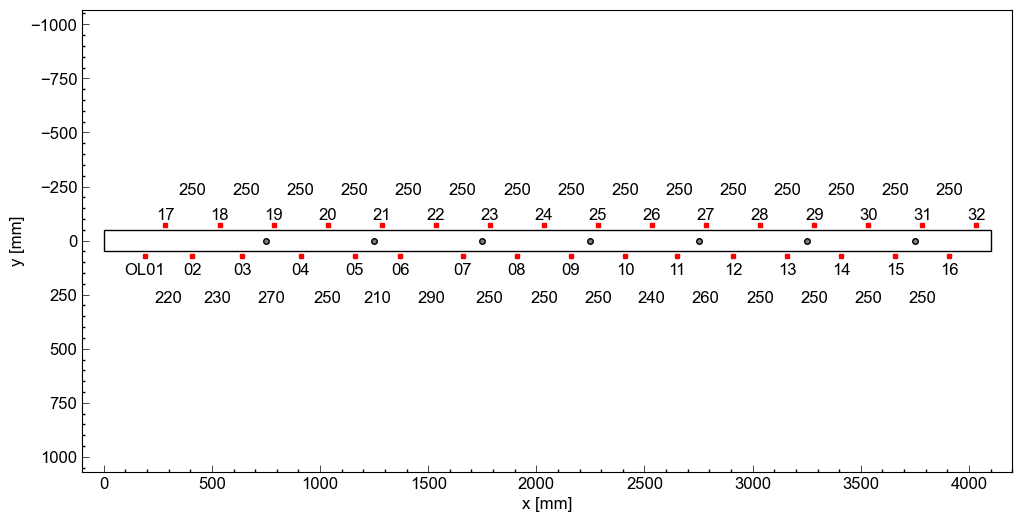

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

left = 0 #[mm]
bottom = -50 #[mm]
width = 4100 #[mm]
height = 100 #[mm]

ax.axis('equal')

rect = Rectangle((left, bottom), width, height, fill=True, color='w', ec='k')

ax.add_patch(rect)


# plot location of stations

for stnm in channel_loc:
    x1 = channel_loc[stnm][0]
    y1 = channel_loc[stnm][1]
    z1 = channel_loc[stnm][2]
    
    AEid = int(stnm[-2::])
    
    # upper side
    if y1 >0:
        ax.plot(x1, y1+20, marker='s', markersize=3, color='r', mec='r', zorder=-1)
        if stnm == "OL01":
            ax.text(x1, y1+50, f"{stnm}", ha="center", va="top")
        else:
            ax.text(x1, y1+50, f"{stnm[-2::]}", ha="center", va="top")

    elif y1 < 0:
        ax.plot(x1, y1-20, marker='s', markersize=3, color='r', mec='r', zorder=-1)
        ax.text(x1, y1-35, f"{stnm[-2::]}", ha="center", va="bottom")
        
    # plot sensor span
    if y1>0:
        if AEid<16:
            stnm_next = f"OL{AEid+1:02d}"
            x1_next = channel_loc[stnm_next][0]
            x1_mid = (x1 + x1_next)/2
            span = x1_next - x1
            ax.text(x1_mid, y1+250, f"{span:.0f}", zorder=1, ha="center", va="bottom")
#             print(AEid)
        
    elif y1<0:
        if AEid<32:
            stnm_next = f"OL{AEid+1:02d}"
            x1_next = channel_loc[stnm_next][0]
            x1_mid = (x1 + x1_next)/2
            span = x1_next - x1
            ax.text(x1_mid, y1-150, f"{span:.0f}", zorder=1, ha="center", va="bottom")
#             print(AEid)
  
    
# Plot location of gouge patch
gougepatch_x = [750, 1250, 1750, 2250, 2750, 3250, 3750]
ax.plot(gougepatch_x, np.zeros(len(gougepatch_x)),"o", markeredgecolor='k', c='gray', ms=4)

ax.set_xlim(-100, 4200)
# ax.grid(True)
# ax.set_xlim(left, width)
# ax.set_ylim(bottom, height/2)
# ax.set_yticks([-50, -25, 0, 25, 50])
# ax.set_aspect(aspect_ratio)
plt.gca().invert_yaxis()

ax.set_xlabel("x [mm]", fontsize=fontsize)
ax.set_ylabel("y [mm]", fontsize=fontsize)
plt.savefig(figdir+"/SensorArray_AE.png", format="png", dpi=150)
plt.savefig(figdir+"/SensorArray_AE.eps", format="eps", dpi=150)


In [30]:
span

250.0

## SGT and SGB

In [31]:
SGB_x = np.stack([290+np.arange(0,16)*240, 110+np.arange(0,16)*240]);
SGT_x = np.stack([170+np.arange(0,16)*240, 230+np.arange(0,16)*240]);

In [32]:
SGB_x[0]

array([ 290,  530,  770, 1010, 1250, 1490, 1730, 1970, 2210, 2450, 2690,
       2930, 3170, 3410, 3650, 3890])

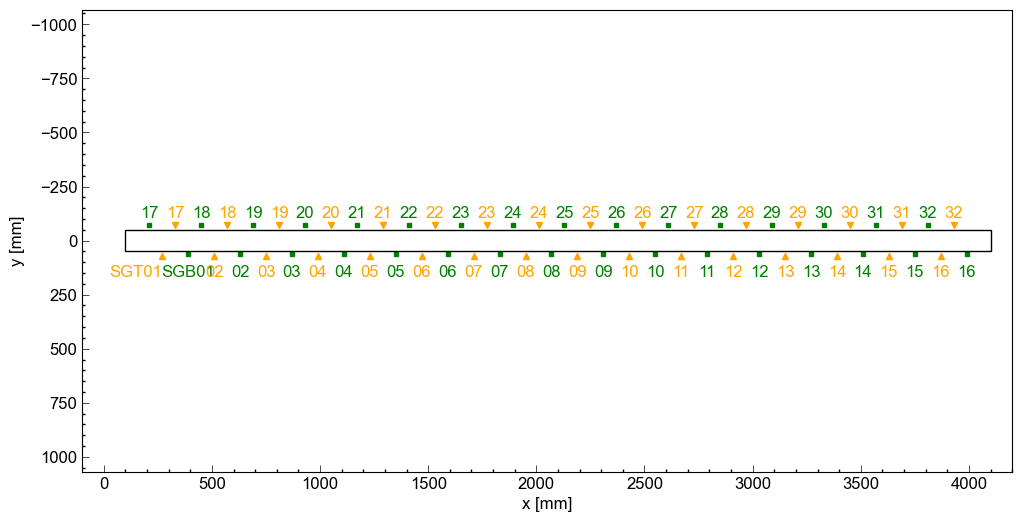

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

left = 100 #[mm]
bottom = -50 #[mm]
width = 4000 #[mm]
height = 100 #[mm]

ax.axis('equal')

rect = Rectangle((left, bottom), width, height, fill=True, color='w', ec='k')

ax.add_patch(rect)

# SGB south
for i, x1 in enumerate(SGB_x[0]):
    ax.plot(left+x1, 60, marker='s', markersize=3, color='g', mec='g', zorder=-1)
    
    if i == 0:
        ax.text(left+x1, 110, f"SGB{i+1:02d}", ha="center", va="top", c='g')
    else:
        ax.text(left+x1, 110, f"{i+1:02d}", ha="center", va="top", c='g')

# SGB north
for i, x1 in enumerate(SGB_x[1]):
    ax.plot(left+x1, -70, marker='s', markersize=3, color='g', mec='g', zorder=-1)
   
    ax.text(left+x1, -160, f"{i+17:02d}", ha="center", va="top", c='g')


# SGT south
for i, x1 in enumerate(SGT_x[0]):
    ax.plot(left+x1, 70, marker='^', markersize=5, color='orange', mec='orange', zorder=-1)
    
    if i == 0:
        ax.text(left+x1, 110, f"SGT{i+1:02d}", ha="right", va="top", c='orange')
    else:
        ax.text(left+x1, 110, f"{i+1:02d}", ha="center", va="top", c='orange')

# SGT north
for i, x1 in enumerate(SGT_x[1]):
    ax.plot(left+x1, -70, marker='v', markersize=5, color='orange', mec='orange', zorder=-1)
    ax.text(left+x1, -160, f"{i+17:02d}", ha="center", va="top", c='orange')
    

ax.set_xlim(-100, 4200)

# ax.set_xlim(left, width)
# ax.set_ylim(bottom, height/2)
# ax.set_yticks([-50, -25, 0, 25, 50])
# ax.set_aspect(aspect_ratio)
plt.gca().invert_yaxis()

ax.set_xlabel("x [mm]", fontsize=fontsize)
ax.set_ylabel("y [mm]", fontsize=fontsize)
plt.savefig(figdir+"/SensorArray_StrainGouge.png", format="png", dpi=150)
plt.savefig(figdir+"/SensorArray_StrainGouge.eps", format="eps", dpi=150)


## Gap sensor

In [34]:
disp_x = 270+np.arange(0, 16)*240

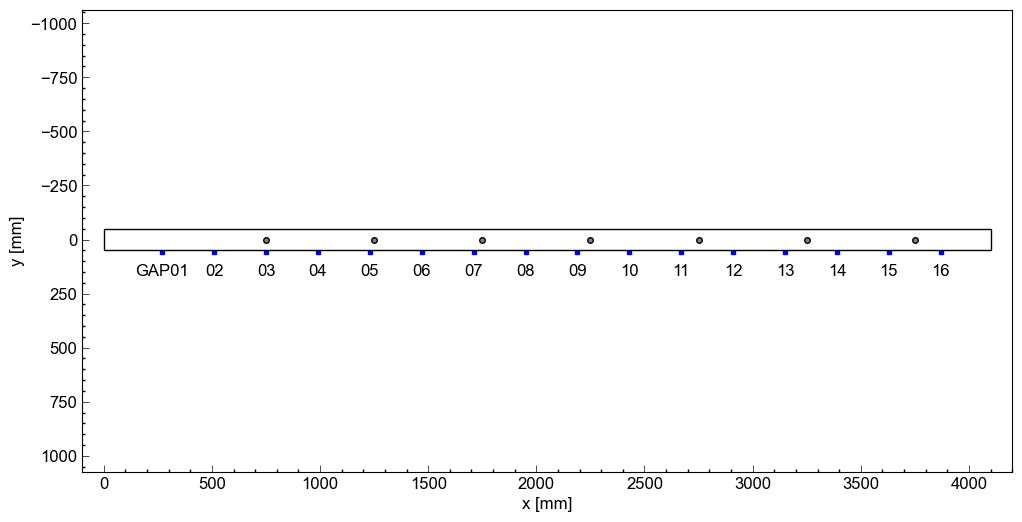

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

left = 0 #[mm]
bottom = -50 #[mm]
width = 4100 #[mm]
height = 100 #[mm]

ax.axis('equal')

rect = Rectangle((left, bottom), width, height, fill=True, color='w', ec='k')

ax.add_patch(rect)

# plot location of stations

for i, x1 in enumerate(disp_x):
    
    ax.plot(x1, 60, marker='s', markersize=3, color='b', mec='b', zorder=-1)
    
    if i == 0:
        ax.text(left+x1, 110, f"GAP{i+1:02d}", ha="center", va="top", c='k')
    else:
        ax.text(left+x1, 110, f"{i+1:02d}", ha="center", va="top", c='k')
    
# Plot location of gouge patch
gougepatch_x = [750, 1250, 1750, 2250, 2750, 3250, 3750]
ax.plot(gougepatch_x, np.zeros(len(gougepatch_x)),"o", markeredgecolor='k', c='gray', ms=4)


ax.set_xlim(-100, 4200)
# ax.grid(True)
# ax.set_xlim(left, width)
# ax.set_ylim(bottom, height/2)
# ax.set_yticks([-50, -25, 0, 25, 50])
# ax.set_aspect(aspect_ratio)
plt.gca().invert_yaxis()

ax.set_xlabel("x [mm]", fontsize=fontsize)
ax.set_ylabel("y [mm]", fontsize=fontsize)
plt.savefig(figdir+"/SensorArray_Gap.png", format="png", dpi=150)
plt.savefig(figdir+"/SensorArray_Gap.eps", format="eps", dpi=150)
